<a href="https://colab.research.google.com/github/rosshalpin/AdvancedML/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
%cd /mydrive/AdvancedML/

/
Mounted at /content/gdrive
/content/gdrive/My Drive/AdvancedML


In [2]:
import pandas as pd

df = pd.read_csv("tweets.1650486802.csv")

In [3]:
df.head()

,place,coords,created_at,possibly_sensitive,retweet_count,reply_count,like_count,quote_count,text,sentiment
0,"Port Blandford, Newfoundland and Labrador","48.36,-54.18",2022-04-20 20:18:29+00:00,False,0,0,0,0,@lemieuxdavid I’m curious where that Baba O’Re...,positive
1,"Coventry, England","52.41,-1.52",2022-04-20 17:37:06+00:00,False,4,1,43,0,Lewis Hamilton Fuji 2007… Another one of his ...,positive
2,"Tamworth, England","52.62,-1.68",2022-04-20 12:51:05+00:00,False,0,2,5,0,@MattyWTF1 Fans being openly contemptuous towa...,negative
3,"Sydney, New South Wales","-33.85,150.93",2022-04-20 09:46:10+00:00,False,0,0,0,0,@MattyWTF1 Carlos Sainz contract negotiations ...,neutral
4,Potchefstroom,"-26.26,28.00",2022-04-20 04:48:19+00:00,False,51,2,51,0,Revamp your Cv + Cover letter to attract recr...,neutral


In [4]:
df.shape

(2500, 10)

Lets remove usernames and hyperlinks as these will not be relevant to the sentiment of the textual elements of the tweet. 

In [5]:
import re

def remove_usernames(text):
  return re.sub(r'@([^\s]+)', '', text)

def remove_hyperlinks(text):
  return re.sub(r'http\S+|www.\S+|https', '', text)

df.text = df.text.apply(remove_usernames)
df.text = df.text.apply(remove_hyperlinks)

Below we also removed duplicates

In [6]:
df = df.drop_duplicates()

In [7]:
df.shape

(2469, 10)

In [8]:
df.sentiment.value_counts(normalize=True) * 100

neutral     59.700284
positive    20.939652
negative    19.360065
Name: sentiment, dtype: float64

In [9]:
df = df.drop(df.query('sentiment == "neutral"').sample(frac=.64, random_state=109).index)

In [10]:
df.sentiment.value_counts(normalize=True) * 100

neutral     34.796855
positive    33.879423
negative    31.323722
Name: sentiment, dtype: float64

In [11]:
df.place.value_counts()

Genua, Ligurië                               9
Kaduna, Nigeria                              2
Nairobi, Kenya                               2
Port Blandford, Newfoundland and Labrador    1
Sungai Buloh, Selangor                       1
Central, Kenya                               1
Kampala, Uganda                              1
Montréal, Québec                             1
Johannesburg, South Africa                   1
Keyser, WV                                   1
Dar es Salaam, Tanzania                      1
Boksburg, South Africa                       1
Winterthur, Schweiz                          1
Salisbury, England                           1
Wales, United Kingdom                        1
Austin, TX                                   1
Biggleswade, England                         1
South Africa                                 1
Middlesbrough, England                       1
Coventry, England                            1
Ramsbottom, England                          1
Hamilton, Sco

In [12]:
df.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)

In [13]:
df.head()

,place,coords,created_at,possibly_sensitive,retweet_count,reply_count,like_count,quote_count,text,sentiment
0,"Port Blandford, Newfoundland and Labrador","48.36,-54.18",2022-04-20 20:18:29+00:00,False,0,0,0,0,Im curious where that Baba OReilly tune may h...,positive
1,"Coventry, England","52.41,-1.52",2022-04-20 17:37:06+00:00,False,4,1,43,0,Lewis Hamilton Fuji 2007 Another one of his b...,positive
2,"Tamworth, England","52.62,-1.68",2022-04-20 12:51:05+00:00,False,0,2,5,0,Fans being openly contemptuous towards Lewis ...,negative
3,"Sydney, New South Wales","-33.85,150.93",2022-04-20 09:46:10+00:00,False,0,0,0,0,Carlos Sainz contract negotiations have stall...,neutral
7,"Nairobi, Kenya","-1.27,36.86",2022-04-19 07:33:49+00:00,False,1,2,10,0,Lewis Hamilton posts a Thirst Trap and my Husb...,positive


In [31]:
df.text.sample(10)

1155    got some Lewis Hamilton monster energy at the ...
754      Lewis Hamilton is ugly. There I said it. Anyw...
2002           How is Lewis Hamilton real ??? Like fr ?? 
2289    No more "Spiderman Boxer's" allowed for our F1...
1539    The Dental Health Bus will be closed from Wedn...
1659    Lewis Hamilton suffering more than Mercedes pa...
2214    Despite some people trying to make it seem lik...
2454    #f1 : Hi my name is Erkan, im not new to f1 &a...
1185     This better be some sick joke ?? Lewis ? HAMI...
977     Hey I'm new to f1twt I like Lewis Hamilton so ...
Name: text, dtype: object

In [15]:
df_sentiment = df.sentiment
df_text = df.text

In [30]:
df_sentiment.sample(10)

239      neutral
1108     neutral
1214     neutral
929      neutral
2037    negative
533     negative
148      neutral
1052     neutral
1325    negative
1331    negative
Name: sentiment, dtype: object

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    _, (ax) = plt.subplots(1, 1, figsize=(20, 5))
    ax.set_ylim(*ylim)
    ax.set_title(title)
    ax.set_xlabel("training sample")
    ax.set_ylabel("score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator, X, y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    ax.grid()
    ax.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    ax.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    ax.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    ax.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    ax.legend(loc="best")

In [18]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import TweetTokenizer

nltk.download('stopwords')

tweet_tokenizer = TweetTokenizer()

def tokenize(input): 
    return tweet_tokenizer.tokenize(input)

def stemmer(input):
  snow_stemmer = SnowballStemmer("english")
  return (snow_stemmer.stem(word) for word in input)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.text, df.sentiment, test_size=0.1, random_state=409, shuffle=True)

vectorizer = TfidfVectorizer(
    strip_accents = 'unicode',
    lowercase = True,
    stop_words = set(stopwords.words("english")),
)


X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

clf = svm.SVC(
    kernel='linear',
)
clf.fit(X_train_vectors, y_train)
y_pred = clf.predict(X_test_vectors)

report = classification_report(y_test, y_pred, output_dict=True)
print('accuracy: ', report['accuracy'])
print('macro avg: ', report['macro avg'])
print('positive: ', report['positive'])
print('negative: ', report['negative'])
print('neutral ', report['neutral'])

accuracy:  0.6470588235294118
macro avg:  {'precision': 0.6473133790119004, 'recall': 0.6445708650965222, 'f1-score': 0.6452935784242775, 'support': 153}
positive:  {'precision': 0.6440677966101694, 'recall': 0.6909090909090909, 'f1-score': 0.6666666666666665, 'support': 55}
negative:  {'precision': 0.5957446808510638, 'recall': 0.5957446808510638, 'f1-score': 0.5957446808510638, 'support': 47}
neutral  {'precision': 0.7021276595744681, 'recall': 0.6470588235294118, 'f1-score': 0.673469387755102, 'support': 51}


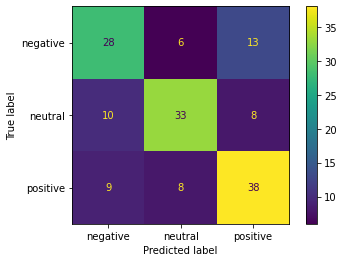

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=["negative", "neutral", "positive"])
cmd.plot()

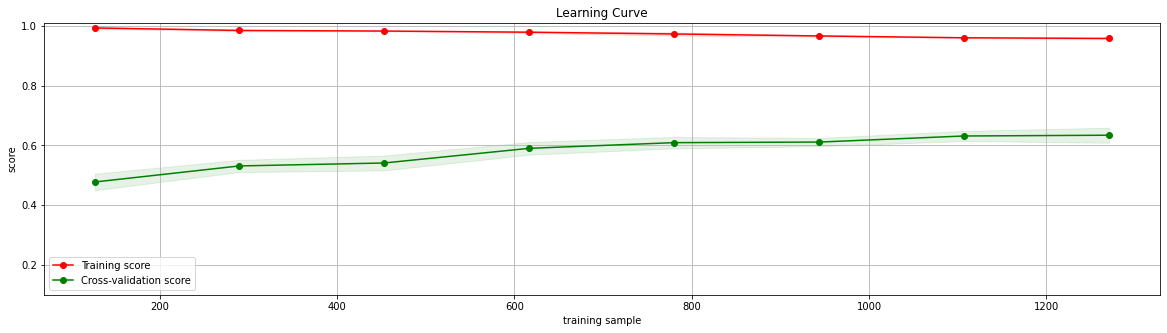

In [32]:
from sklearn.model_selection import StratifiedKFold

folds = StratifiedKFold(n_splits=6, shuffle=True, random_state=1)

plot_learning_curve(
    clf, 
    "Learning Curve", 
    X=vectorizer.fit_transform(df.text), 
    y=df.sentiment,
    ylim=(0.1, 1.01), 
    cv=folds, 
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 8)
)

plt.show()

As we can see with cross validation and plotting the learning curve, we still are overfitting by quite a bit. This is likely due to the lower amount of data. We can see that the cross validation test score is rising rapidly, while training seems to be dropping more gradually. Another issue is that vectorising text creates a large feature set. With a lower amount of data and a large feature set we are likely to overfit. 

In [22]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 7.8 MB/s 


In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
  analysis = analyzer.polarity_scores(text)
  score = analysis["compound"]
  if score >= 0.05:
    return "positive"
  if score > -0.05 and score < 0.05:
    return "neutral"
  if score <= -0.05:
    return "negative"

vader_df = pd.DataFrame(X_test).apply(get_sentiment, axis=1)

As we can see the accuracy and f1-score is ~5% worse with Vader than our own model. This is possibly due to the overfitting of our model, but we must take vaders behaviour into account also. 

In [24]:
vader_report = classification_report(vader_df, y_test, output_dict=True)
print('accuracy: ', vader_report['accuracy'])
print('macro avg: ', vader_report['macro avg'])
print('positive: ', vader_report['positive'])
print('negative: ', vader_report['negative'])
print('neutral ', vader_report['neutral'])

accuracy:  0.6078431372549019
macro avg:  {'precision': 0.6003590346519007, 'recall': 0.6135834165359197, 'f1-score': 0.5946467837096949, 'support': 153}
positive:  {'precision': 0.8181818181818182, 'recall': 0.5921052631578947, 'f1-score': 0.6870229007633587, 'support': 76}
negative:  {'precision': 0.5319148936170213, 'recall': 0.6097560975609756, 'f1-score': 0.5681818181818181, 'support': 41}
neutral  {'precision': 0.45098039215686275, 'recall': 0.6388888888888888, 'f1-score': 0.5287356321839081, 'support': 36}


Lets take a look at the normalised percentages of sentiments by Vader and our sentiment analyser. It appears that Vader seems to predict there is a lot more positive sentiment in the dataset. 

In [25]:
vader_df.value_counts(normalize=True) * 100

positive    49.673203
negative    26.797386
neutral     23.529412
dtype: float64

This compared to the performance of our own model and the normalised percentages of sentiments.

In [26]:
pred_df = pd.DataFrame(y_pred)
pred_df.value_counts(normalize=True) * 100

positive    38.562092
negative    30.718954
neutral     30.718954
dtype: float64

We see further evidence of vader leaning positive in the confusion matrix where all sentiments have inflated positive labeling. 

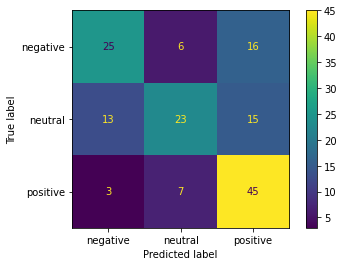

In [27]:
cm = confusion_matrix(y_test, vader_df)
cmd = ConfusionMatrixDisplay(cm, display_labels=["negative", "neutral", "positive"])
cmd.plot()

Below we see that my classifier and Vader only agree about 56% of the time on average. 

In [29]:
vader_df = vader_df.reset_index(drop=True)
vader_df.eq(pred_df[0].values).mean()

0.5620915032679739